In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'c:\Users\User\Downloads\Economy Journals.csv')
df.head(5)

,Unnamed: 0,title,publisher,society,price,pages,charpp,citations,foundingyear,subs,field
0,APEL,Asian-Pacific Economic Literature,Blackwell,no,123,440,3822,21,1986,14,General
1,SAJoEH,South African Journal of Economic History,So Afr ec history assn,no,20,309,1782,22,1986,59,Economic History
2,CE,Computational Economics,Kluwer,no,443,567,2924,22,1987,17,Specialized
3,MEPiTE,MOCT-MOST Economic Policy in Transitional Econ...,Kluwer,no,276,520,3234,22,1991,2,Area Studies
4,JoSE,Journal of Socio-Economics,Elsevier,no,295,791,3024,24,1972,96,Interdisciplinary


In [3]:
df.describe()

,price,pages,charpp,citations,foundingyear,subs
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,417.722222,827.744444,3232.700000,647.055556,1966.905556,196.866667
std,385.834596,436.817402,819.358285,1182.373679,25.711484,204.528847
min,20.000000,167.000000,1782.000000,21.000000,1844.000000,2.000000
25%,134.500000,548.750000,2715.000000,97.750000,1962.750000,52.000000
50%,282.000000,693.000000,3010.000000,262.500000,1973.000000,122.500000
75%,540.750000,974.250000,3476.750000,656.000000,1982.250000,268.250000
max,2120.000000,2632.000000,6859.000000,8999.000000,1996.000000,1098.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    180 non-null    object
 1   title         180 non-null    object
 2   publisher     180 non-null    object
 3   society       180 non-null    object
 4   price         180 non-null    int64 
 5   pages         180 non-null    int64 
 6   charpp        180 non-null    int64 
 7   citations     180 non-null    int64 
 8   foundingyear  180 non-null    int64 
 9   subs          180 non-null    int64 
 10  field         180 non-null    object
dtypes: int64(6), object(5)
memory usage: 15.6+ KB


In [9]:
df = df.drop_duplicates()

In [10]:
df.dropna()
df.head(5)

,Unnamed: 0,title,publisher,society,price,pages,charpp,citations,foundingyear,subs,field
0,APEL,Asian-Pacific Economic Literature,Blackwell,no,123,440,3822,21,1986,14,General
1,SAJoEH,South African Journal of Economic History,So Afr ec history assn,no,20,309,1782,22,1986,59,Economic History
2,CE,Computational Economics,Kluwer,no,443,567,2924,22,1987,17,Specialized
3,MEPiTE,MOCT-MOST Economic Policy in Transitional Econ...,Kluwer,no,276,520,3234,22,1991,2,Area Studies
4,JoSE,Journal of Socio-Economics,Elsevier,no,295,791,3024,24,1972,96,Interdisciplinary


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(5)

,title,publisher,society,price,pages,charpp,citations,foundingyear,subs,field
0,Asian-Pacific Economic Literature,Blackwell,no,123,440,3822,21,1986,14,General
1,South African Journal of Economic History,So Afr ec history assn,no,20,309,1782,22,1986,59,Economic History
2,Computational Economics,Kluwer,no,443,567,2924,22,1987,17,Specialized
3,MOCT-MOST Economic Policy in Transitional Econ...,Kluwer,no,276,520,3234,22,1991,2,Area Studies
4,Journal of Socio-Economics,Elsevier,no,295,791,3024,24,1972,96,Interdisciplinary


In [15]:
#let's start our exploration now!

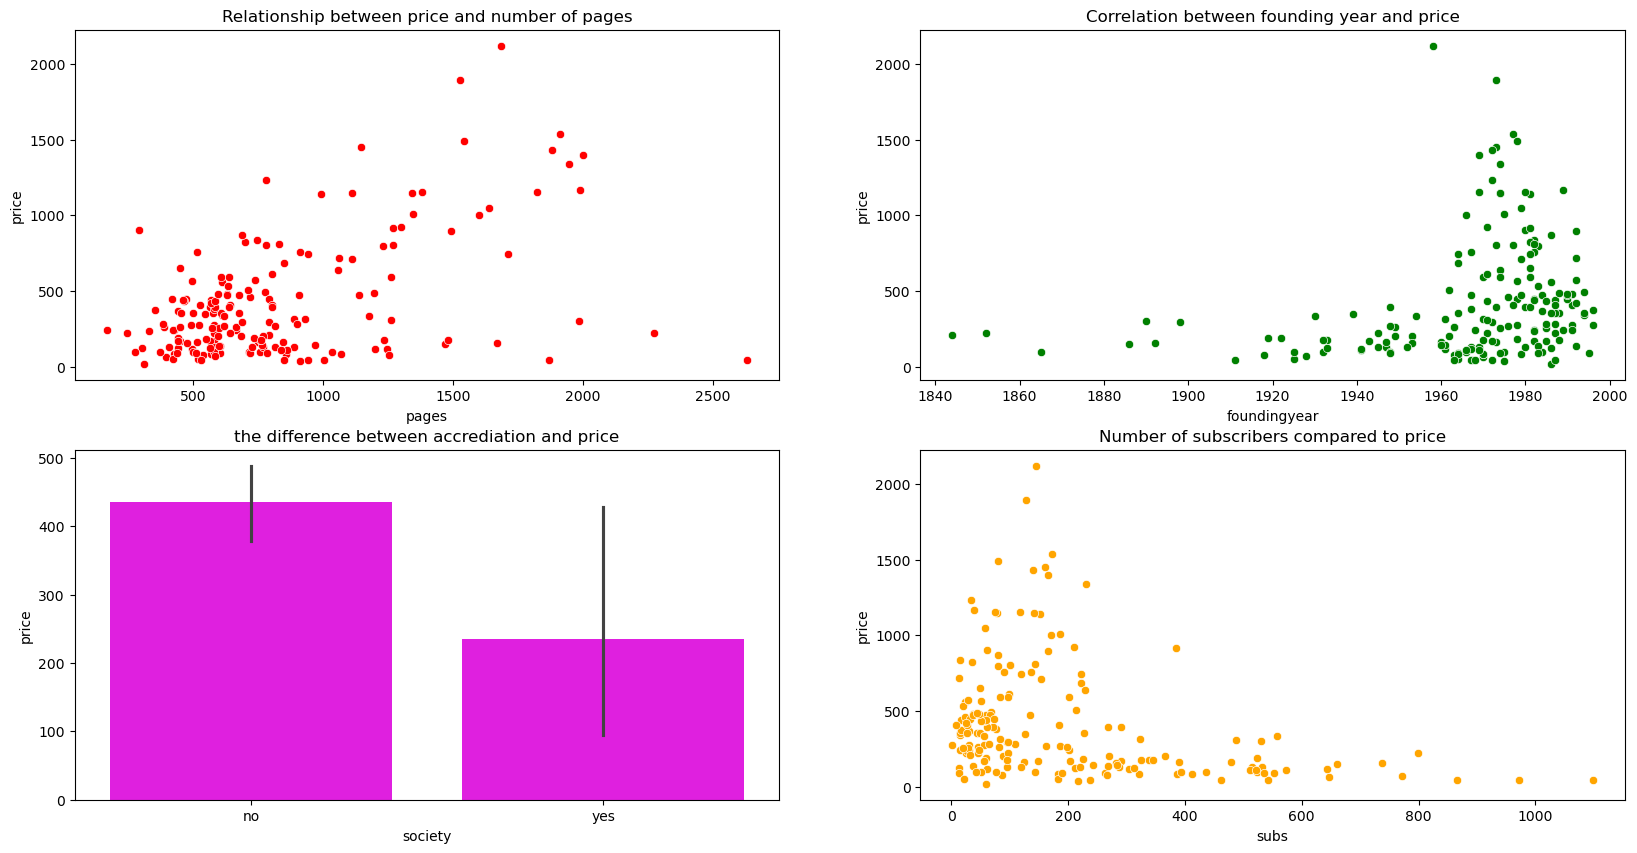

In [17]:
fig,axes = plt.subplots(nrows=2,ncols = 2,figsize=(20,10));

sns.scatterplot(ax = axes[0,0],x='pages',y='price',data = df,color = 'red');
sns.scatterplot(ax = axes[0,1],x='foundingyear',y='price',data = df,color = 'green');
sns.barplot(ax = axes[1,0],x='society',y='price',data = df,color = 'Fuchsia');
sns.scatterplot(ax = axes[1,1],x='subs',y='price',data = df,color='orange');

axes[0,0].title.set_text('Relationship between price and number of pages')
axes[0,1].title.set_text('Correlation between founding year and price')
axes[1,0].title.set_text('the difference between accrediation and price')
axes[1,1].title.set_text('Number of subscribers compared to price')

C:\Users\User\AppData\Local\Temp\ipykernel_6676\2843153152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='field', data=df, order=sorted_order, palette='rocket')


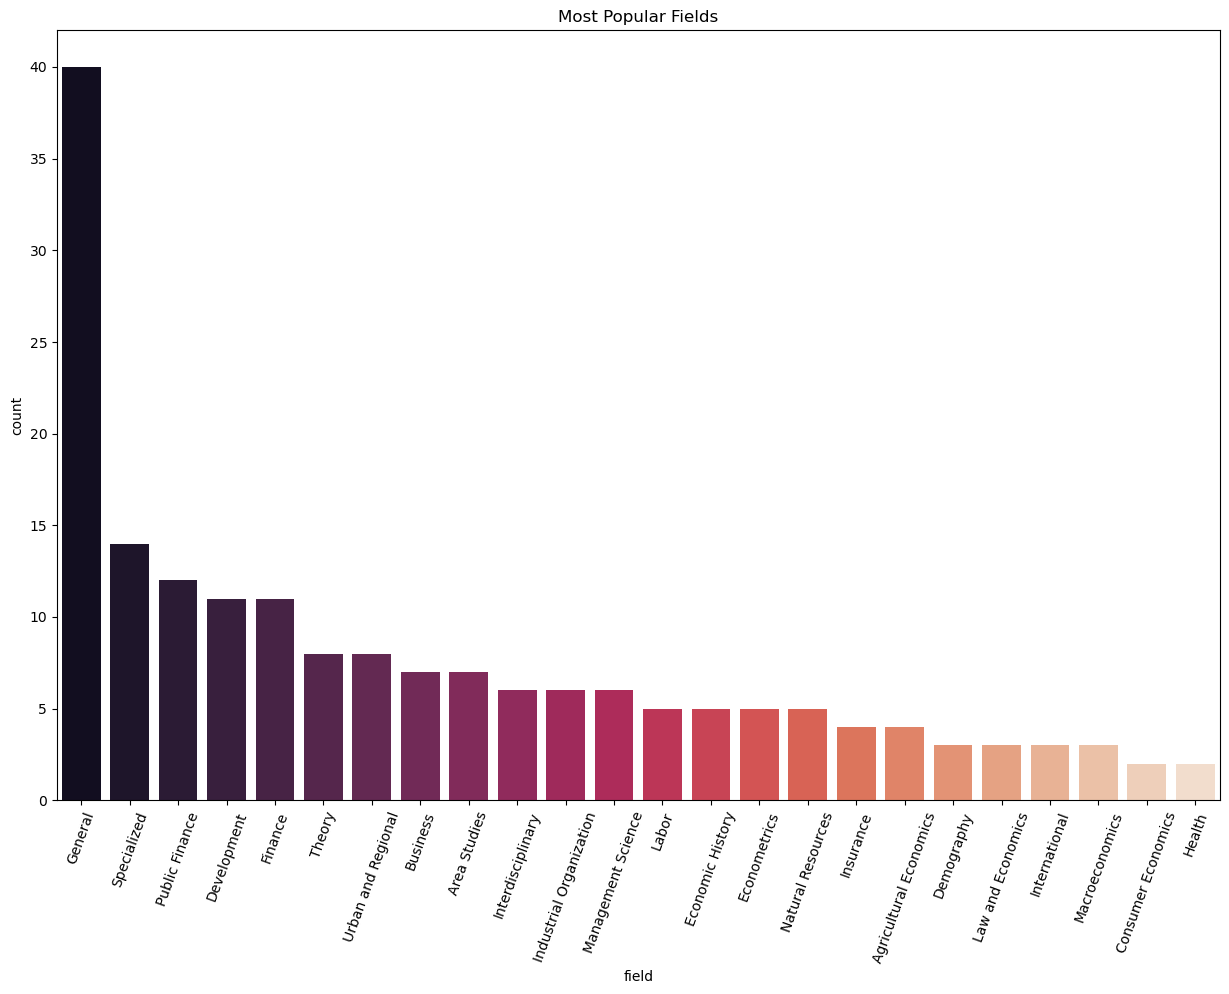

In [20]:
sorted_order = df['field'].value_counts().index


plt.figure(figsize=(15, 10))
sns.countplot(x='field', data=df, order=sorted_order, palette='rocket')
plt.xticks(rotation=70)
plt.title('Most Popular Fields')
plt.show()

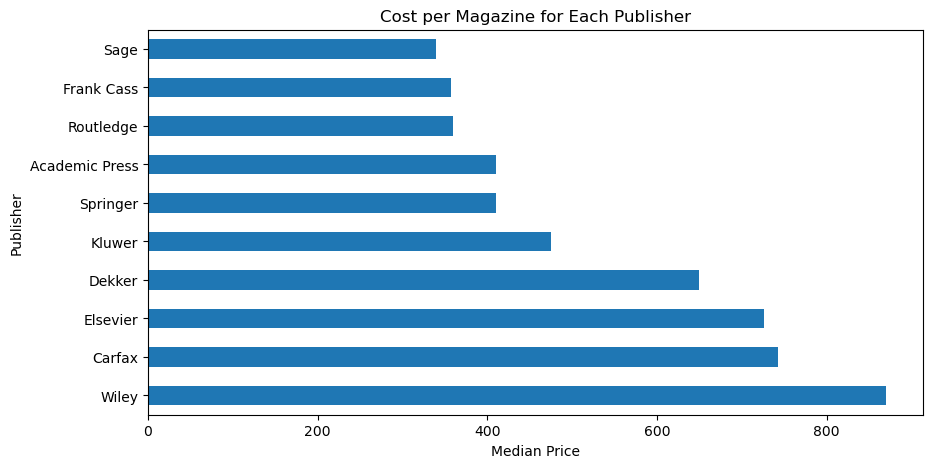

In [22]:
df.groupby('publisher')['price'].median().sort_values(ascending=False).head(10).plot(
    kind='barh',
    figsize=(10, 5),
    title='Cost per Magazine for Each Publisher'
)
plt.xlabel('Median Price')  
plt.ylabel('Publisher')     
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6676\1878522274.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['society'] = df['society'].replace({'no':0,'yes':1})
C:\Users\User\AppData\Local\Temp\ipykernel_6676\1878522274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['society'] = df['society'].replace({'no':0,'yes':1})


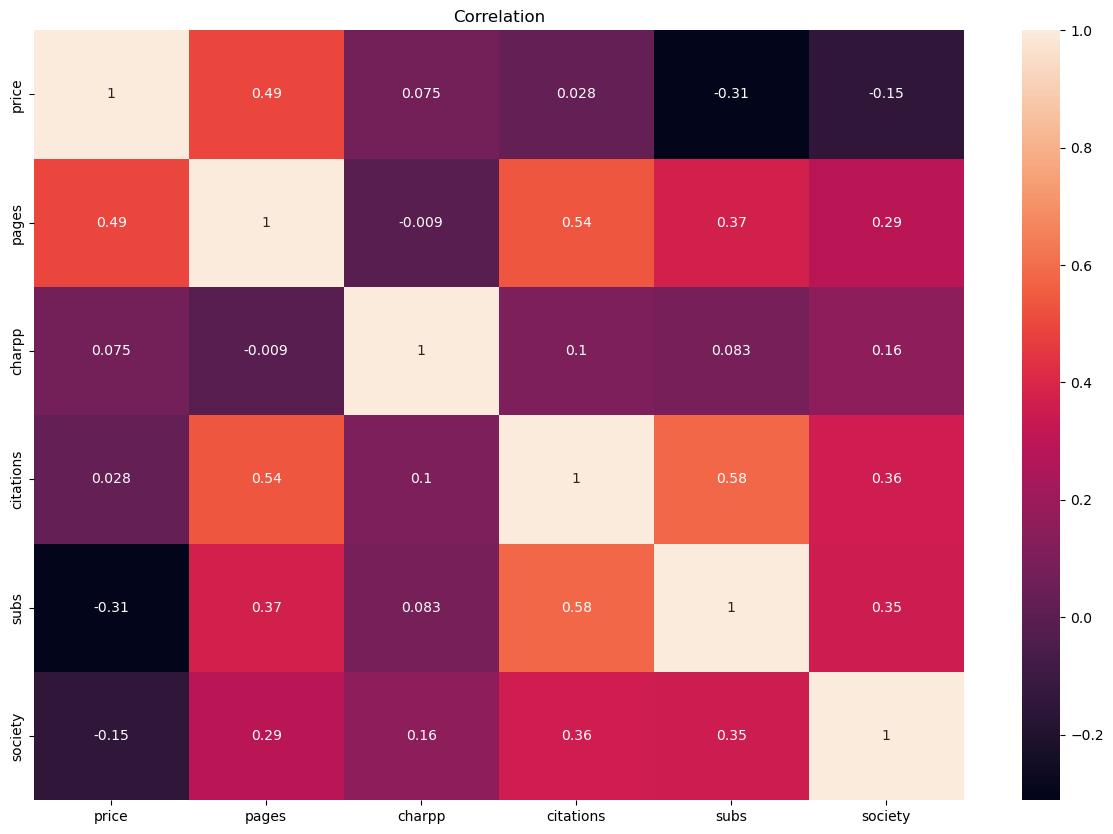

In [23]:
df['society'] = df['society'].replace({'no':0,'yes':1})
df['society'].dtype
corr_data = df.loc[:,['price','pages','charpp','citations','subs','society']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(data = corr_data,annot= True);
plt.title('Correlation');